In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image

In [33]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img

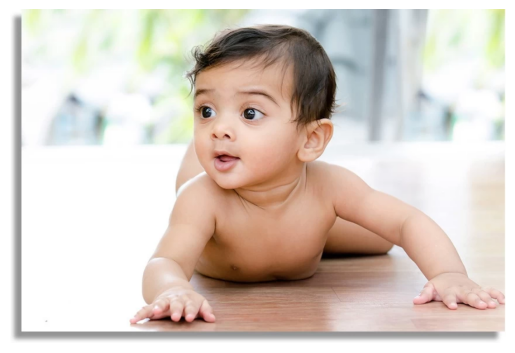

In [48]:
filename = 'baby.webp'
img = read_file(filename)

org_img = np.copy(img)

# Create Edge Mask

In [35]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ''''
    input: gray scale img
    output: edges of img
    '''
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

    return edges

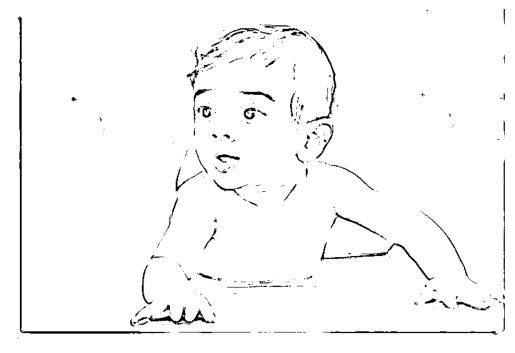

In [36]:
line_size, blur_value = 7,7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap = 'gray')
plt.axis('off')
plt.show()

# Reduce the Color Palette

In [37]:
def color_quantization(img, k):
     # Transform the img
     data = np.float32(img).reshape((-1,3))

     # Determine Criteria
     criteria = (cv2.TermCriteria_EPS + cv2.TermCriteria_MAX_ITER, 20, 0.001)

     # Implement K-Means
     ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
     center = np.uint8(center)

     result = center[label.flatten()]
     result = result.reshape(img.shape)

     return result

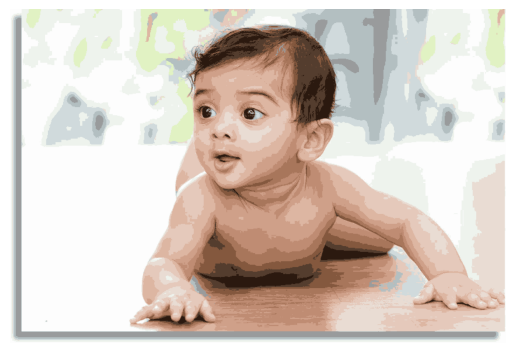

In [62]:
quantized_img = color_quantization(img, k = 15)
plt.imshow(quantized_img)
plt.axis('off')
plt.show()

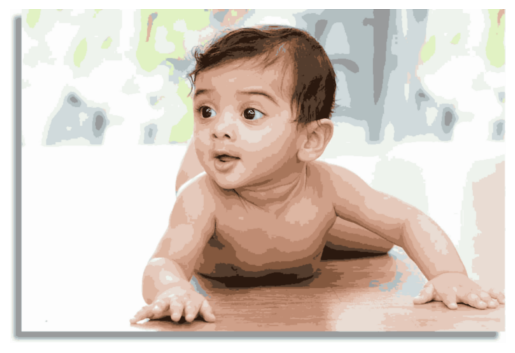

In [63]:
# Reduce the noise
blurred = cv2.bilateralFilter(quantized_img, d = 3, sigmaColor = 200, sigmaSpace = 200)

plt.imshow(blurred)
plt.axis('off')
plt.show()

# comine Edge Mask with the quantized img

In [64]:
def cartoon(blurred):
    c = cv2.bitwise_and(blurred, blurred, mask = edges)

    plt.imshow(org_img)
    plt.title('Original Img')
    plt.axis('off')
    plt.show()

    plt.imshow(c)
    plt.title('Cartoon Img')
    plt.axis('off')
    plt.show()


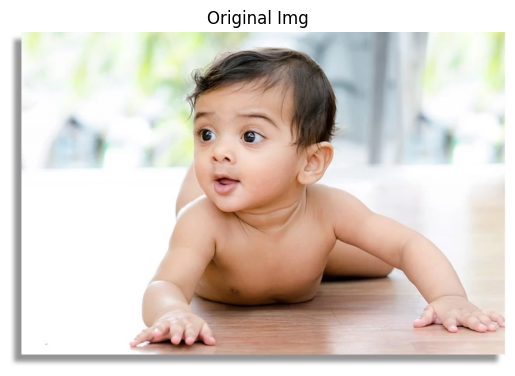

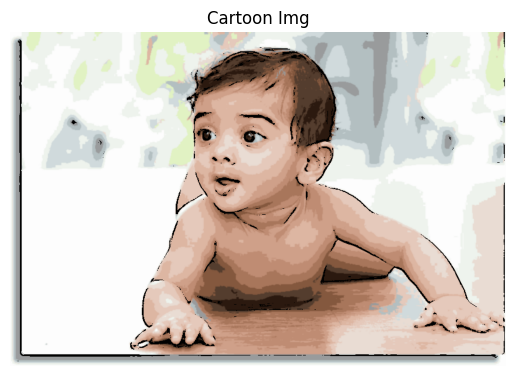

In [65]:
cartoon(blurred)